## 参考 
https://qiita.com/TANATY/items/d60a335ba1ad813bf9b5

### Basic

In [3]:
# ライブラリのインポート

import MDAnalysis

# テストデータの読み込み（PSF:トポロジー、DCD：トラジェクトリ）
from MDAnalysis.tests.datafiles import PSF, DCD

In [4]:
# universeの作成(ファイルの読み込み)

u = MDAnalysis.Universe(PSF, DCD)
print (u)


<Universe with 3341 atoms>


/home/rintaro/anaconda3/lib/python3.9/site-packages/MDAnalysis/coordinates/DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [5]:
# ATOM　obujectの作成
print (u.atoms)
##output
print(list (u.atoms[:5]))

<AtomGroup [<Atom 1: N of type 56 of resname MET, resid 1 and segid 4AKE>, <Atom 2: HT1 of type 2 of resname MET, resid 1 and segid 4AKE>, <Atom 3: HT2 of type 2 of resname MET, resid 1 and segid 4AKE>, ..., <Atom 3339: C of type 32 of resname GLY, resid 214 and segid 4AKE>, <Atom 3340: OT1 of type 72 of resname GLY, resid 214 and segid 4AKE>, <Atom 3341: OT2 of type 72 of resname GLY, resid 214 and segid 4AKE>]>
[<Atom 1: N of type 56 of resname MET, resid 1 and segid 4AKE>, <Atom 2: HT1 of type 2 of resname MET, resid 1 and segid 4AKE>, <Atom 3: HT2 of type 2 of resname MET, resid 1 and segid 4AKE>, <Atom 4: HT3 of type 2 of resname MET, resid 1 and segid 4AKE>, <Atom 5: CA of type 22 of resname MET, resid 1 and segid 4AKE>]


In [6]:
# 残基の抽出
print(u.atoms[100:130].residues)
print(list(u.atoms.residues))

<ResidueGroup [<Residue LEU, 6>, <Residue GLY, 7>, <Residue ALA, 8>]>
[<Residue MET, 1>, <Residue ARG, 2>, <Residue ILE, 3>, <Residue ILE, 4>, <Residue LEU, 5>, <Residue LEU, 6>, <Residue GLY, 7>, <Residue ALA, 8>, <Residue PRO, 9>, <Residue GLY, 10>, <Residue ALA, 11>, <Residue GLY, 12>, <Residue LYS, 13>, <Residue GLY, 14>, <Residue THR, 15>, <Residue GLN, 16>, <Residue ALA, 17>, <Residue GLN, 18>, <Residue PHE, 19>, <Residue ILE, 20>, <Residue MET, 21>, <Residue GLU, 22>, <Residue LYS, 23>, <Residue TYR, 24>, <Residue GLY, 25>, <Residue ILE, 26>, <Residue PRO, 27>, <Residue GLN, 28>, <Residue ILE, 29>, <Residue SER, 30>, <Residue THR, 31>, <Residue GLY, 32>, <Residue ASP, 33>, <Residue MET, 34>, <Residue LEU, 35>, <Residue ARG, 36>, <Residue ALA, 37>, <Residue ALA, 38>, <Residue VAL, 39>, <Residue LYS, 40>, <Residue SER, 41>, <Residue GLY, 42>, <Residue SER, 43>, <Residue GLU, 44>, <Residue LEU, 45>, <Residue GLY, 46>, <Residue LYS, 47>, <Residue GLN, 48>, <Residue ALA, 49>, <Residu

In [7]:
# タンパク質、モノマーの抽出
print(u.atoms.segments)

print(list(u.atoms.segments))

<SegmentGroup [<Segment 4AKE>]>
[<Segment 4AKE>]


## Important methods and attributes of AtomGroup

上の`positions`のように、出力できる重要な例として。

- center_of_mass( ) :　系の重心
- centor_of_geometry( ) : 重心
- total_mass( ) : 質量
- total_chargre( ) : 電荷
- radius_of_gyration( ) : 慣性半径
- principal_axis( ) : 使ったこと無いのでわかりません

などがある。

## Trajectory analysis
参考  
https://magattaca.hatenablog.com/entry/2022/04/28/200955

In [8]:
# トラジェクトリのフレーム数
print(len(u.trajectory))

98


In [9]:
# タンパク質のアラインメント
from MDAnalysis.analysis import align

# トラジェクトリの位置を最初のフレームにリセットする
u.trajectory[0]

# align.AlignTrajでアラインメントを取る
alignment = align.AlignTraj( mobile = u, reference = u, select="protein", in_memory=True)
alignment.run()


In [10]:
# フレーム二点間のRMSDを計算する
from MDAnalysis.analysis import rms

# 最初のフレームにリセット
u.trajectory[0]

# 最初のタンパク質の位置
protein_first = u.select_atoms("protein").positions

# 最後のフレームに移動
u.trajectory[-1]

# 最後のタンパク質の位置
protein_last = u.select_atoms("protein").positions

# rmsdを評価
print(rms.rmsd(protein_first, protein_last))

6.929083003796687


In [11]:
# トラジェクトリ全体のrmsdを計算する

# フレームのリセット
u.trajectory[0]

# RMSD解析
RMSD_analysis = rms.RMSD(u,   # アラインメントを取るオブジェクト  
                     u,     # アラインメントを合わせるリファレンスのオブジェクト  
                     select = "backbone",  # 計算対象を主鎖にする  
                     ref_frame = 0    # リファレンスのフレームインデックス  
                        )
RMSD_analysis.run() 

In [12]:
print("type : ", type(RMSD_analysis.results.rmsd))
print("1st data : ", RMSD_analysis.results.rmsd[0])
print("total data number : ", len(RMSD_analysis.results.rmsd))

# type :  <class 'numpy.ndarray'>
# 1st data :  [0.0000000e+00 0.0000000e+00 6.0600393e-07]
# total data number :  50

type :  <class 'numpy.ndarray'>
1st data :  [0.00000000e+00 0.00000000e+00 5.83434382e-07]
total data number :  98


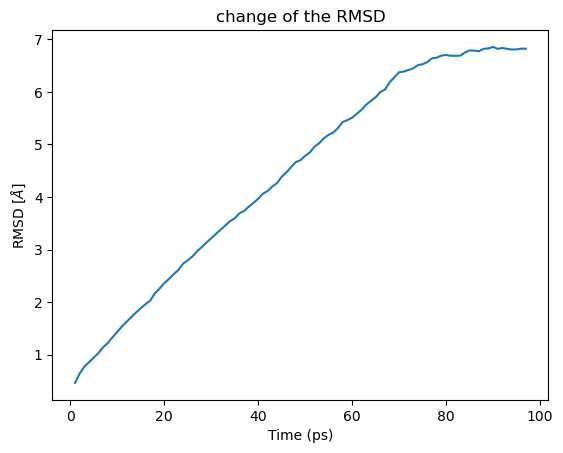

In [13]:
# RMSDのプロット
import matplotlib.pyplot as plt

time_ps = RMSD_analysis.results.rmsd[1:, 1]
backbone_RMSDs = RMSD_analysis.results.rmsd[1:, 2]

plt.plot(time_ps, backbone_RMSDs)

plt.title("change of the RMSD")
plt.xlabel("Time (ps)")
plt.ylabel("RMSD [$\AA$]")
plt.show()


/tmp/ipykernel_18179/4288657058.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sb.kdeplot(RMSD_analysis.results.rmsd[1:, 2], shade=True)


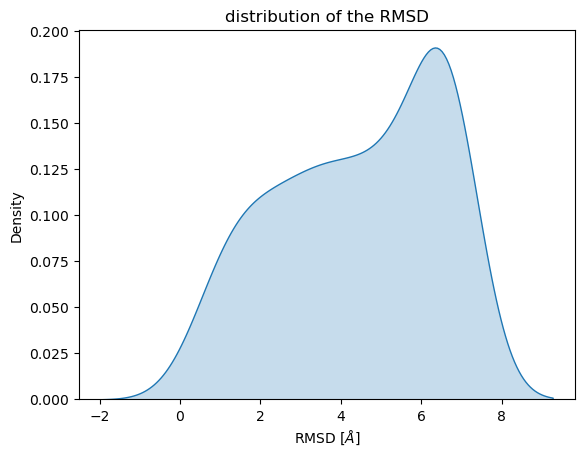

In [14]:
# 確立分布

import seaborn as sb

sb.kdeplot(RMSD_analysis.results.rmsd[1:, 2], shade=True)

plt.title("distribution of the RMSD")
plt.xlabel("RMSD [$\AA$]")
plt.show()